In [2]:
import numpy as np
import scipy.io as sio
import mat73 

import os
os.chdir('/home/victorh/projects/gtx/utils')

from draw_stuff import *

In [3]:
def read_mat_data(path):
    mat_data = mat73.loadmat(path)
    return {
        'fluorescence': mat_data['F'],
        'op': mat_data['OP'],
        'depth': mat_data['DF'],
        'concentration_fluor': mat_data['QF'],
        'reflectance': mat_data['RE']
    }

In [4]:
def get_data(idx, data_list):
    return {
        'fluorescence': data_list['fluorescence'][idx,...],
        'op': data_list['op'][idx,...],
        'depth': data_list['depth'][idx,...],
        'concentration_fluor': data_list['concentration_fluor'][idx,...],
        'reflectance': data_list['reflectance'][idx,...]
    }

In [101]:
sample = read_mat_data('../data/mcx/10_DL_nImages1000_new_newOP.mat')

In [ ]:
# 7: 943, # 8: 586, #10: 297, 656

In [98]:
one = get_data(586, sample)
one['fluorescence'].shape

(100, 100, 6)

In [102]:
for i in range(1000):
    sample_1 = get_data(i, sample)
    mua = sample_1['op'][..., 0]
    mus = sample_1['op'][..., 1]
    
    assert np.mean(mua) > 0
    assert np.mean(mus) > 1
        

AssertionError: 

In [103]:
for i in range(1000):
    sample_1 = get_data(i, sample)
    mean_val = np.mean(sample_1['op'][..., 0])
    
    if np.isnan(mean_val):
        print(f"{i} -> mean is NaN")
    elif mean_val <= 0:
        print(f"{i} -> mean is {mean_val:.4f} (<= 0)")
    
    # assert mean_val > 0
    # assert np.mean(sample_1['op'][..., 1]) > 1

297 -> mean is 0.0000 (<= 0)
656 -> mean is 0.0000 (<= 0)


0.0
0.0


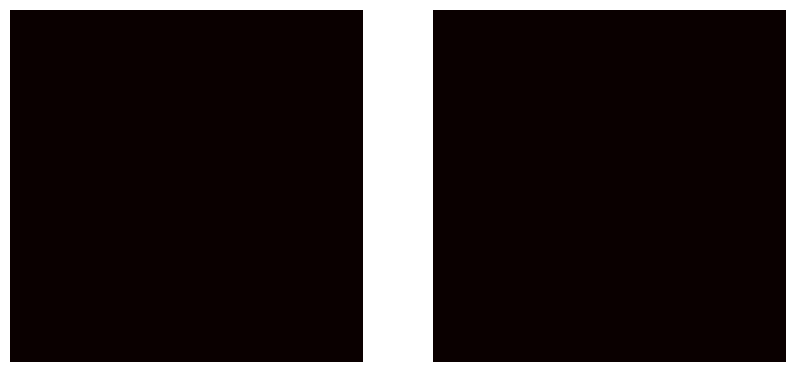

In [105]:
sample_1 = get_data(656, sample)
print(np.max(sample_1['op'][..., 0]))
print(np.max(sample_1['op'][..., 1]))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    axs[i].imshow(sample_1['op'][:, :, i], cmap='hot', interpolation='nearest')
    axs[i].axis('off')